In [2]:
import matplotlib.pyplot as plt 
from matplotlib.patches import PathPatch, Polygon
from matplotlib.path import Path
from mplbasketball import Court
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/Stephen_Curry_clutch.csv")
df


,MINUTES_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,20,121,162,1
1,1,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-125,134,1
2,0,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,1,1
3,0,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,15,1
4,1,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-123,145,1
...,...,...,...,...,...,...,...,...,...,...,...
2200,3,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-71,243,0
2201,0,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,-45,242,0
2202,3,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,43,255,0
2203,1,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,190,200,0


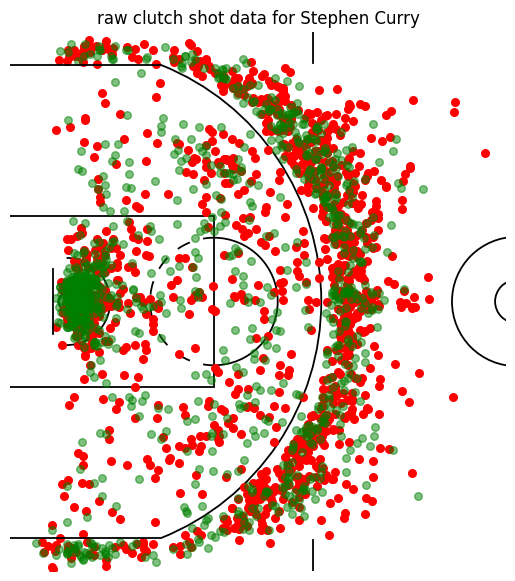

In [4]:

def draw_half_court():
    court_nba = Court(court_type="nba", units="ft", origin="center")
    fig, ax = plt.subplots(figsize=(10, 7))
    court_nba.draw(ax=ax)
    ax.set_xlim(left= -47,right=-1)
    ax.set_ylim(bottom=-25,top=25)

    return fig,ax

df["LOC_X_ft"] = df["LOC_X"]/10
df["LOC_Y_ft"] = df["LOC_Y"]/10

df["LOC_X_ADJUSTED"] = df["LOC_Y_ft"] - 41.75
df["LOC_Y_ADJUSTED"] = df["LOC_X_ft"]

made_shots = df[df["SHOT_MADE_FLAG"] ==1]
missed_shots = df[df["SHOT_MADE_FLAG"] ==0]
fig,ax = draw_half_court()
ax.set_aspect('equal')
ax.scatter(missed_shots["LOC_X_ADJUSTED"], missed_shots["LOC_Y_ADJUSTED"], c='red', s=30)
ax.scatter(made_shots["LOC_X_ADJUSTED"], made_shots["LOC_Y_ADJUSTED"], c='green', s=30, alpha = 0.5)


ax.set_title("raw clutch shot data for Stephen Curry")
plt.show()


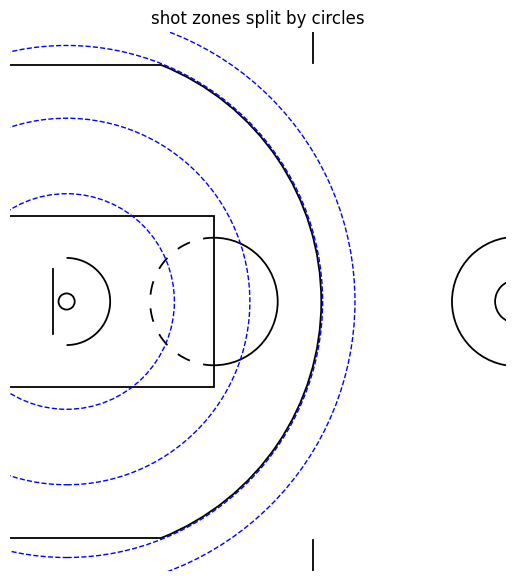

In [5]:

fig,ax = draw_half_court()
ax.set_title("shot zones split by circles")
closeshot =plt.Circle((-41.75, 0), 10, color='blue', fill=False, linestyle='--')
closemidrange =plt.Circle((-41.75, 0), 17, color='blue', fill=False, linestyle='--')
threeptcirclestart = plt.Circle((-41.75, 0), 23.75, color='blue', fill=False, linestyle='--')
deep3zonestart = plt.Circle((-41.75, 0), 26.75, color='blue', fill=False, linestyle='--')
ax.add_patch(closeshot)
ax.add_patch(closemidrange)
ax.add_patch(threeptcirclestart)
ax.add_patch(deep3zonestart)

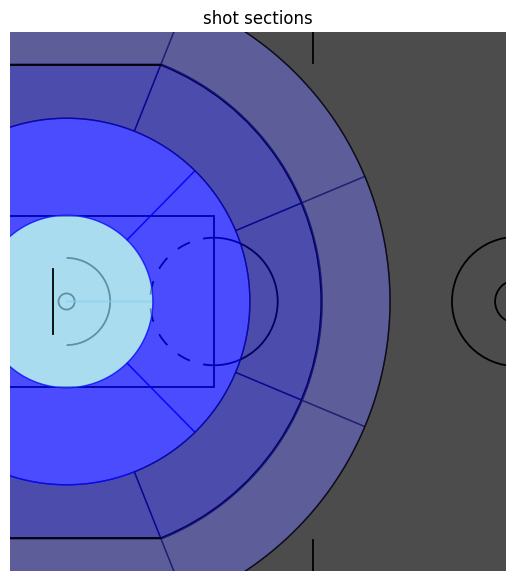

In [6]:


fig,ax = draw_half_court()
ax.set_title("shot sections")

def draw_sections(r_inner,r_outer,t1,t2,colour):
    n_points = 100
    theta1 = np.radians(t1)
    theta2 = np.radians(t2)
    #outer radius
    theta_outer = np.linspace(theta1, theta2, n_points)
    x_outer = -41.75 + r_outer * np.cos(theta_outer)
    y_outer = 0 + r_outer * np.sin(theta_outer)

    #inner radius
    theta_inner = np.linspace(theta2, theta1, n_points)
    x_inner = -41.75 + r_inner * np.cos(theta_inner)
    y_inner = 0 + r_inner * np.sin(theta_inner)


    xs = np.concatenate([x_outer, x_inner])
    ys = np.concatenate([y_outer, y_inner])
    polygon_points = np.column_stack([xs, ys])

    poly = Polygon(polygon_points, closed=True, color=colour, alpha=0.7)
    return poly

def draw_corner_sections(r,t1,t2,x_left,x_right,y_cap,colour):
    theta1 = np.radians(t1)
    theta2 = np.radians(t2)
    #arc
    theta_outer = np.linspace(theta1, theta2, 100)
    x_arc = -41.75 + r * np.cos(theta_outer)
    y_arc = 0 + r * np.sin(theta_outer)
    #using the edges of the arc points
    x_right_top = x_arc[-1]
    x_left_top = x_arc[0]
    y_right_top = y_arc[-1]
    y_left_top = y_arc[0]
    xs = np.concatenate([x_arc,[x_right_top,x_right,x_left,x_left_top]])
    ys = np.concatenate([y_arc,[y_right_top,y_cap,y_cap,y_left_top]])
    polygon_points = np.column_stack([xs, ys])

    poly = Polygon(polygon_points, closed=True, color=colour, alpha=0.7)
    return poly



#0 is x axis, +1 is possitve y
theta4 = 68.31093183
theta3 = 22.7552756
theta5 = 45.53310372
layups = draw_sections(0,8,0,360,'skyblue')
left_far_corner = draw_corner_sections(17,180,theta4,-47,-33,22,'darkblue')
left_close_corner = draw_sections(8,17,180,theta5,'blue')
#left_close_wing = draw_sections(8,17,theta4,theta3,'blue')
center_close_mid = draw_sections(8,17,theta5,-theta5,'blue')
#right_close_wing = draw_sections(8,17,-theta3,-theta4,'blue')
right_far_corner = draw_corner_sections(17,-180,-theta4,-47,-33,-22,'darkblue')
right_close_corner = draw_sections(8,17,-180,-theta5,'blue')
left_far_wing = draw_sections(17,23.7,theta4,theta3,'darkblue')
center_far_mid = draw_sections(17,23.7,theta3,-theta3,'darkblue')
right_far_wing = draw_sections(17,23.7,-theta3,-theta4,'darkblue')
right_wing_three = draw_sections(23.7,30,-theta3,-theta4,'midnightblue')
left_wing_three = draw_sections(23.7,30,theta4,theta3,'midnightblue')
center_three = draw_sections(23.7,30,theta3,-theta3,'midnightblue')
left_corner_three = draw_corner_sections(30,180,theta4,-47,-33,22,'midnightblue')
right_corner_three = draw_corner_sections(30,-180,-theta4,-47,-33,-22,'midnightblue')
deep_three = draw_sections(30,50,theta4,-theta4,'black')
ax.add_patch(layups)
ax.add_patch(left_close_corner)
ax.add_patch(left_far_corner)
ax.add_patch(center_close_mid)
ax.add_patch(right_far_corner)
ax.add_patch(right_close_corner)
ax.add_patch(left_far_wing)
ax.add_patch(center_far_mid)
ax.add_patch(right_far_wing)
ax.add_patch(right_wing_three)
ax.add_patch(left_wing_three)
ax.add_patch(center_three)
ax.add_patch(left_corner_three)
ax.add_patch(right_corner_three)
ax.add_patch(deep_three)

plt.show()


In [ ]:
#convert coords from x and y to polar (radius and theta)
df["RADIUS"] = np.sqrt((df["LOC_X_ADJUSTED"]+41.75)**2 + df["LOC_Y_ADJUSTED"]**2)
df["THETA"] = np.degrees(np.arctan2(df["LOC_Y_ADJUSTED"],df["LOC_X_ADJUSTED"]+41.75))


def shot_section(r, theta):
    if r <= 8:
        return "layup"
    elif r >8 and r <=17:
        if theta <180 and theta >= theta5:
            return "right close midrange"
        elif theta <theta5 and theta >= -theta5:
            return "centre close midrange"
        elif theta <-theta5 and theta >= -180:
            return "left close midrange"
    elif r>17 and r <=23:
        if theta <180 and theta >= theta4:
            return "right corner midrange"
        elif theta <theta4 and theta >= theta3:
            return "right wing midrange"
        elif theta < theta3 and theta >= -theta3:
            return "centre midrange"
        elif theta < -theta3 and theta >= -theta4:
            return "left wing midrange"
        elif theta < -theta4 and theta >=-180:
            return "left corner midrange"
    elif r>23 and r<=30:
        if theta <180 and theta >= theta4:
            return "right corner three"
        elif theta <theta4 and theta >= theta3:
            return "right wing three"
        elif theta < theta3 and theta >= -theta3:
            return "centre three"
        elif theta < -theta3 and theta >= -theta4:
            return "left wing three"
        elif theta < -theta4 and theta >=-180:
            return "left corner three"
    elif r>30:
        return "deep three"
    else:
        return "out of range"
    
df["SHOT_SECTION"] = df.apply(lambda row: shot_section(row["RADIUS"], row["THETA"]), axis=1)

sections = df["SHOT_SECTION"].unique()
section_percentages = {} #stores percentages for each section in dict

for section in sections:
    try:
        section_percent = len(df[(df["SHOT_SECTION"] == section) & (df["SHOT_MADE_FLAG"] ==1)])/len(df[df["SHOT_SECTION"] == section])
    except ZeroDivisionError:
        print(f"no shots in this section {section}")
        section_percent = 0
    finally:
        section_percentages[section] = section_percent




,MINUTES_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,LOC_X_ft,LOC_Y_ft,LOC_X_ADJUSTED,LOC_Y_ADJUSTED,RADIUS,THETA,SHOT_SECTION
2185,3,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-147,227,0,-14.7,22.7,-19.05,-14.7,27.044038,-32.926169,left wing three
2186,2,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,19,165,108,1,16.5,10.8,-30.95,16.5,19.720294,56.793430,right wing midrange
2187,1,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-228,115,0,-22.8,11.5,-30.25,-22.8,25.536053,-63.234264,left wing three
2188,1,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,29,173,242,0,17.3,24.2,-17.55,17.3,29.747773,35.560068,right wing three
2189,3,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,29,82,286,0,8.2,28.6,-13.15,8.2,29.752311,15.998301,centre three
2190,4,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-212,149,0,-21.2,14.9,-26.85,-21.2,25.912352,-54.899294,left wing three
2191,4,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,31,2,1,3.1,0.2,-41.55,3.1,3.106445,86.308614,layup
2192,3,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-154,238,0,-15.4,23.8,-17.95,-15.4,28.347839,-32.905243,left wing three
2193,2,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,33,31,1,3.3,3.1,-38.65,3.3,4.527693,46.789911,layup
2194,1,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,16,304,0,1.6,30.4,-11.35,1.6,30.442076,3.012788,deep three
